## importing library

In [107]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score

## loading dataset

In [108]:
dataset = pd.read_csv("https://raw.githubusercontent.com/leenaali1114/Titanic-Dataset/main/Titanic_Dataset.csv")

In [109]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [110]:
dataset.shape

(1309, 12)

## EDA

In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


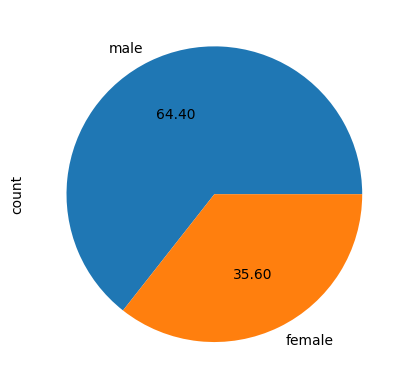

In [112]:
dataset['Sex'].value_counts().plot(kind="pie", autopct="%.2f")

plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_15648\2671675859.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='Survived',y='Sex',ci=None)


<Axes: xlabel='Survived', ylabel='Sex'>

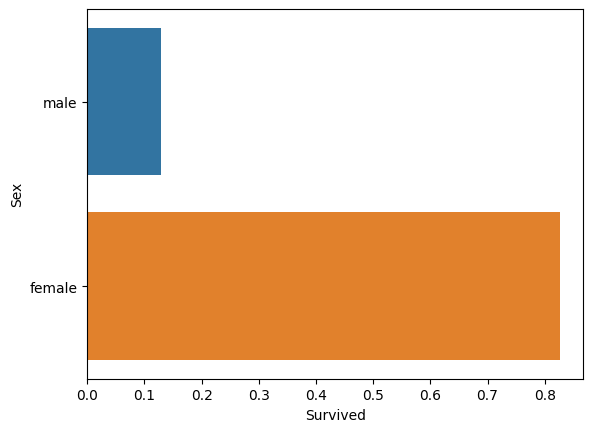

In [113]:
sns.barplot(data=dataset, x='Survived',y='Sex',ci=None)

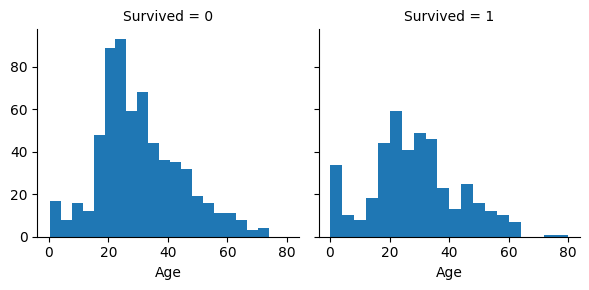

In [114]:
g = sns.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Age', bins=20)

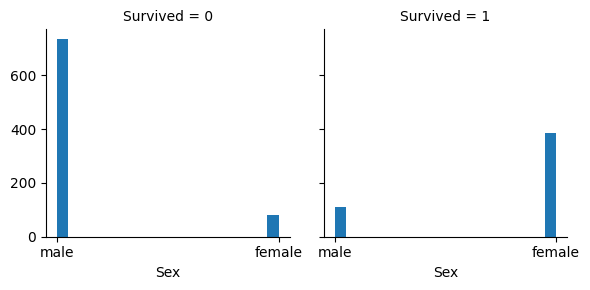

In [115]:
g = sns.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Sex', bins=20)

In [116]:
dataset=dataset.drop(['PassengerId'],axis=1)

In [117]:
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [118]:
dataset = dataset.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1)

In [119]:
dataset


,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
1304,0,3,male,NaN,S
1305,1,1,female,39.0,C
1306,0,3,male,38.5,S
1307,0,3,male,NaN,S


In [120]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
Embarked      2
dtype: int64

In [121]:
mean_age = dataset['Age'].mean()
mean_age

29.881137667304014

In [122]:
dataset["Age"].fillna(mean_age, inplace=True)

In [123]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    2
dtype: int64

In [124]:
dataset.dropna(subset=['Embarked'], inplace=True)

In [125]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [126]:
dataset


,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.000000,S
1,1,1,female,38.000000,C
2,1,3,female,26.000000,S
3,1,1,female,35.000000,S
4,0,3,male,35.000000,S
...,...,...,...,...,...
1304,0,3,male,29.881138,S
1305,1,1,female,39.000000,C
1306,0,3,male,38.500000,S
1307,0,3,male,29.881138,S


In [127]:
dataset.groupby('Survived').size()

Survived
0    815
1    492
dtype: int64

In [128]:
dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [129]:
gen={"male":0,"female":1}
dataset['Sex'] = dataset['Sex'].map(gen)

In [130]:
dataset

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.000000,S
1,1,1,1,38.000000,C
2,1,3,1,26.000000,S
3,1,1,1,35.000000,S
4,0,3,0,35.000000,S
...,...,...,...,...,...
1304,0,3,0,29.881138,S
1305,1,1,1,39.000000,C
1306,0,3,0,38.500000,S
1307,0,3,0,29.881138,S


In [131]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [132]:
emb={"S":0,"C":1,"Q":2}
dataset['Embarked'] = dataset['Embarked'].map(emb)

In [133]:
dataset

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.000000,0
1,1,1,1,38.000000,1
2,1,3,1,26.000000,0
3,1,1,1,35.000000,0
4,0,3,0,35.000000,0
...,...,...,...,...,...
1304,0,3,0,29.881138,0
1305,1,1,1,39.000000,1
1306,0,3,0,38.500000,0
1307,0,3,0,29.881138,0


In [134]:
dataset.groupby('Survived').size()

Survived
0    815
1    492
dtype: int64

In [136]:
from sklearn.utils import resample
dataset_dead = dataset[(dataset['Survived']==0)] 
dataset_alive = dataset[(dataset['Survived']==1)] 
# upsample minority class
dataset_alive_upsampled = resample(dataset_alive, 
                                 replace=True,    # sample with replacement
                                 n_samples= 815, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
dataset = pd.concat([dataset_dead,dataset_alive_upsampled])

In [139]:
dataset.groupby('Survived').size()

Survived
0    815
1    815
dtype: int64

## spliting into train set and test set

In [147]:
x = dataset.iloc[:,1:5].values
y = dataset.iloc[:,0].values;

In [148]:
x

array([[ 3.        ,  0.        , 22.        ,  0.        ],
       [ 3.        ,  0.        , 35.        ,  0.        ],
       [ 3.        ,  0.        , 29.88113767,  2.        ],
       ...,
       [ 3.        ,  1.        , 22.        ,  0.        ],
       [ 2.        ,  1.        , 22.        ,  1.        ],
       [ 1.        ,  1.        , 32.        ,  1.        ]])

In [149]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [153]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (1141, 4)
y_train:  (1141,)
x_test:  (489, 4)
y_test:  (489,)


## Logistic regression

In [155]:
model_lr = LogisticRegression(max_iter = 600)

In [157]:
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=600)

In [159]:
y_pred_lr = model_lr.predict(x_test)

In [161]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.8629856850715747


## K Nearest Neighbors Classifier

In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
model_knn = KNeighborsClassifier()

In [167]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [169]:
y_pred_knn = model_knn.predict(x_test)

In [171]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.7975460122699386


## Decision Tree Classifier

In [173]:
from sklearn.tree import DecisionTreeClassifier

In [175]:
model_dt = DecisionTreeClassifier()

In [177]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [179]:
y_pred_dt = model_dt.predict(x_test)

In [181]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.8588957055214724


## Naive Bayes Classifier

In [183]:
from sklearn.naive_bayes import GaussianNB

In [185]:
model_nb = GaussianNB()

In [187]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [189]:
y_pred_nb = model_nb.predict(x_test)

In [192]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.8507157464212679


## Support Vector Machine

In [194]:
from sklearn.svm import SVC

In [196]:
model_svc = SVC(gamma='auto')

In [198]:
model_svc.fit(x_train,y_train)

SVC(gamma='auto')

In [200]:
y_pred_svc = model_nb.predict(x_test)

In [202]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.8507157464212679


## Random Forest Classifier

In [204]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [208]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [210]:
y_pred_rf = model_nb.predict(x_test)

In [212]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.8507157464212679


## Prediction

In [217]:
Xnew = [[1,1,15,2]]

ynew = model_lr.predict(Xnew)

print(ynew)

[1]


In [216]:
Xnew = [[3,0,45,1]]

ynew = model_lr.predict(Xnew)

print(ynew)

[0]
